In [104]:
# This code makes use of modules that help us in data manipulation and also to visualize the data.

import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# Here, we bring in the dataset on which we want to work on

data = pd.read_excel('raw-customer-churn-data.xlsx', engine='openpyxl')


C:\Users\12094\anaconda3\envs\udemy\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [106]:
#This code shows us a sample of how the data looks like that we just loaded.

data.head(30)

,Name,Gender,Age,Payment Method,Churn,LastTransaction
0,Nicolas Garrett,male,64.0,credit card,loyal,98
1,Isaac Reyes,male,35.0,cheque,churn,118
2,Jaime Sullivan,female,25.0,credit card,loyal,107
3,Geraldine Miller,female,39.0,credit card,NaN,177
4,Curtis Frazier,m,39.0,credit card,loyal,90
5,Jeannie Palmer,female,28.0,cheque,churn,189
6,Phyllis Romero,female,21.0,credit card,loyal,102
7,Maxine Edwards,female,NaN,cheque,loyal,111
8,Marty Cohen,NaN,32.0,cheque,churn,50
9,Lionel Mendoza,male,48.0,credit card,loyal,141


In [107]:
# Data statistics
#This code gives us detailed information of the statistics of the data.
#This helps to understand the data and identify any potential issues or preprocessing it may require on all columns.
# we can observe that we see categorical values under Gender,payment method and also in churn where as Age and last transaction is numerical and Name has unique strings.

print(data.describe(include='all'))

                 Name Gender         Age Payment Method  Churn  \
count             999    998  998.000000            999    903   
unique            998      4         NaN              3      2   
top     Santiago Cruz   male         NaN    credit card  loyal   
freq                2    548         NaN            650    580   
mean              NaN    NaN   45.593186            NaN    NaN   
std               NaN    NaN   18.765320            NaN    NaN   
min               NaN    NaN   17.000000            NaN    NaN   
25%               NaN    NaN   30.000000            NaN    NaN   
50%               NaN    NaN   44.000000            NaN    NaN   
75%               NaN    NaN   58.000000            NaN    NaN   
max               NaN    NaN   91.000000            NaN    NaN   

        LastTransaction  
count        999.000000  
unique              NaN  
top                 NaN  
freq                NaN  
mean         110.945946  
std           44.977049  
min            1.000000  

In [108]:
# Missing data report
# Here we check for any missing values in each column to understand inconsistencies.
# From the output we can say that churn column has a lot of missing values that needs to be taken care of along with Gender and Age with just 1 value missing.

print(data.isnull().sum())

Name                0
Gender              1
Age                 1
Payment Method      0
Churn              96
LastTransaction     0
dtype: int64


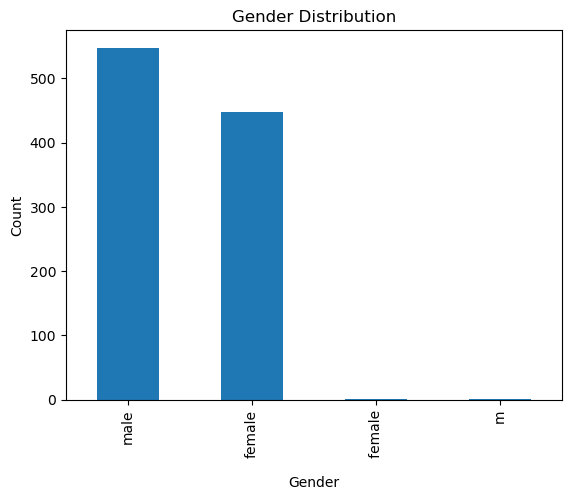

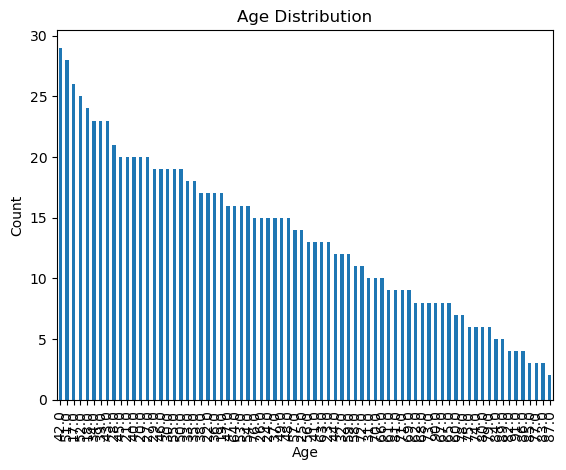

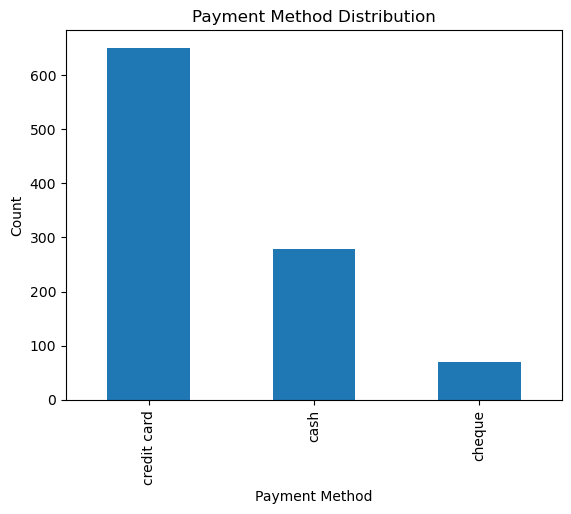

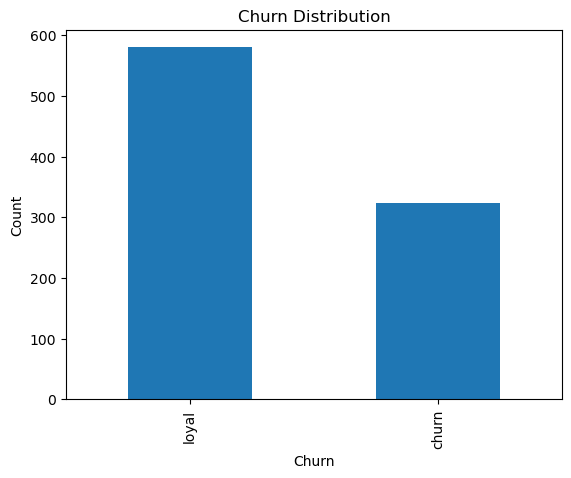

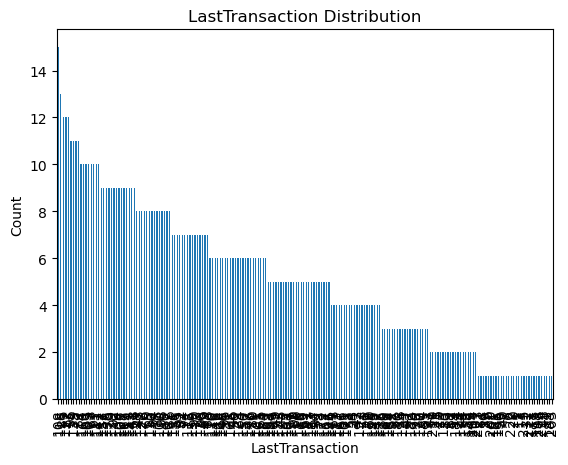

In [109]:
# Inorder to understand if there's a skew in the data in each column we visulaize the data.
# considering the visulizations In gender column, Male customers are more but not significantly.
# In age column we see that there is a consistency of all age customers with the highest number of customers of age 40-42.
# and with payment method most of the customers transact with credit card and very few customers using cheque for transactions.
# with regards to churn it turns out most of the customers are loyal which is a good sign for business.
# and last transaction shows that lot of customers made a huge amount transactions recently.

def visualize_attribute_distribution(data, attribute):
  value_counts = data[attribute].value_counts()
  value_counts.plot(kind='bar')
  plt.xlabel(attribute)
  plt.ylabel('Count')
  plt.title(f'{attribute} Distribution')
  plt.show()

# Here we exclude Name column from being visualised as it has unique strings which cannot be plotted with numerical values.
for attribute in data.columns:
  if attribute != 'Name':
    visualize_attribute_distribution(data, attribute)


In [110]:
# here we try to Find the full details of duplicated rows by considering only the first occurrence in the whole dataset
# and we see that there is only one row that has repeated.

duplicates = data[data.duplicated(keep='first')]

if not duplicates.empty:
  print("\nDetails of duplicate rows:")
  print(duplicates) 
else:
  print("\nNo duplicate rows found.")





Details of duplicate rows:
             Name Gender   Age Payment Method  Churn  LastTransaction
12  Santiago Cruz   male  36.0    credit card  loyal               46


In [111]:
# Fix leading and trailing white spaces
# unnecessary White spaces or gap in strings( Names) occupy a lot of memory hence to make the performance better we shoudl remove it.
# This code efficiently  goes through each cell of each column and cleans whitespaces from all string columns like Name, payment method, churn but leaves the numerical cloumns  like last transaction, age unchanged.

data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x) 


In [112]:
# Remove duplicate rows.
# As we observed that there was one duplicated row, using this code we delete that duplicated row considering only the first occurence of it.

data = data.drop_duplicates() 

In [113]:
# Fix inconsistencies in data
# there were a lot of strings in gender that had mistakes for male just like m.
# This code checks each cell in gender and replaces with "male" wherever it is spelled wrong but doesn't affect the the word female.

data.replace({'Gender' : {'^m$' : 'male'}}, regex= True, inplace=True)

In [114]:
# Fill Missing Values - Imputation 
# As previously we found that there was a lot of missing values in churn,Gender and age.
# We can delete those rows but we would lose a lot of data which might not help us for further processes while training a model.
# hence we make use of Forward fill method which fills the missing value with the previous value.

data = data.fillna(method='ffill')

In [115]:
# Pre Processed data
# Now we can see that we have a clean data with no missing values, No unnecessary spaces or mispelled words that can be used to train or test data to build a model.

data.head(30)

,Name,Gender,Age,Payment Method,Churn,LastTransaction
0,Nicolas Garrett,male,64.0,credit card,loyal,98
1,Isaac Reyes,male,35.0,cheque,churn,118
2,Jaime Sullivan,female,25.0,credit card,loyal,107
3,Geraldine Miller,female,39.0,credit card,loyal,177
4,Curtis Frazier,male,39.0,credit card,loyal,90
5,Jeannie Palmer,female,28.0,cheque,churn,189
6,Phyllis Romero,female,21.0,credit card,loyal,102
7,Maxine Edwards,female,21.0,cheque,loyal,111
8,Marty Cohen,female,32.0,cheque,churn,50
9,Lionel Mendoza,male,48.0,credit card,loyal,141
